In [1]:
import pandas as pd
from sklearn import datasets

In [9]:
# https://www.kaggle.com/c/boston-housing

boston = datasets.load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [36]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

In [37]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


X
    # :Attribute Information (in order):
    #     - CRIM     per capita crime rate by town
    #     - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    #     - INDUS    proportion of non-retail business acres per town
    #     - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    #     - NOX      nitric oxides concentration (parts per 10 million)
    #     - RM       average number of rooms per dwelling
    #     - AGE      proportion of owner-occupied units built prior to 1940
    #     - DIS      weighted distances to five Boston employment centres
    #     - RAD      index of accessibility to radial highways
    #     - TAX      full-value property-tax rate per $10,000
    #     - PTRATIO  pupil-teacher ratio by town
    #     - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    #     - LSTAT    % lower status of the population

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [40]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Length: 404, dtype: float64

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(13, input_shape=(13,), activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))

# regression - no activation function in the last layer
model.add(Dense(1))

# in regression we use mse loss function
model.compile(optimizer='adam', loss='mse')

In [41]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 8ms/step - loss: 59.8670 - val_loss: 47.7137
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 58.7514 - val_loss: 45.8948
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 58.4302 - val_loss: 46.1962
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 58.1946 - val_loss: 45.6916
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 57.0826 - val_loss: 44.9916
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 56.5343 - val_loss: 43.3446
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 56.1728 - val_loss: 44.1016
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 56.1048 - val_loss: 42.5662
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 55.7017 - val_loss: 42.5682
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 54.8782 - val_los

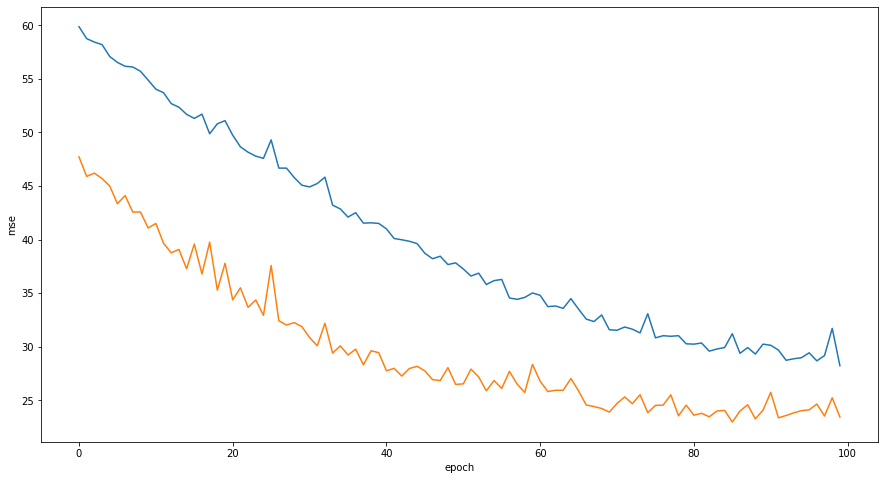

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mse')

plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])

In [43]:
y_pred = model.predict(X_test)


In [44]:
y_pred.shape

(102, 1)

In [45]:
y_test.shape

(102,)

In [46]:
y_df = pd.DataFrame({'pred':y_pred[:,0], 'true':y_test})

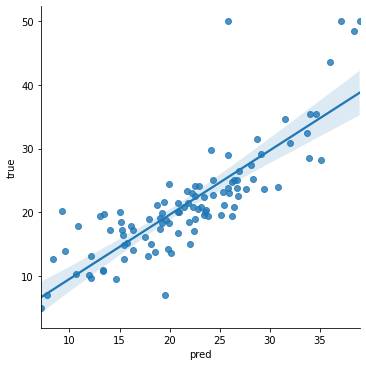

In [47]:
import seaborn as sns
sns.lmplot(x='pred', y='true', data = y_df)

In [48]:
y_df = y_df.sort_index()

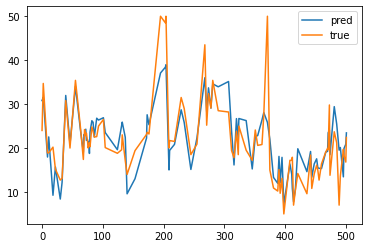

In [49]:
y_df.plot()